# IMPORTING LIBRARIES

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# LOADING THE DATASET

In [3]:
df = pd.read_csv("Datasets/fraudTrain.csv",
                 usecols=['trans_date_trans_time','cc_num','amt','lat','long',
                          'city_pop','unix_time','merch_lat','merch_long','is_fraud'])

print(df)

        trans_date_trans_time        cc_num     amt      lat      long  \
0            01-01-2019 00:00  2.703190e+15    4.97  36.0788  -81.1781   
1            01-01-2019 00:00  6.304230e+11  107.23  48.8878 -118.2105   
2            01-01-2019 00:00  3.885950e+13  220.11  42.1808 -112.2620   
3            01-01-2019 00:01  3.534090e+15   45.00  46.2306 -112.1138   
4            01-01-2019 00:03  3.755340e+14   41.96  38.4207  -79.4629   
...                       ...           ...     ...      ...       ...   
1048570      10-03-2020 16:07  6.011980e+15   77.00  39.0305  -76.5515   
1048571      10-03-2020 16:07  4.839040e+15  116.94  41.1826  -92.3097   
1048572      10-03-2020 16:08  5.718440e+11   21.27  38.2507  -85.7476   
1048573      10-03-2020 16:08  4.646850e+18    9.52  40.7320  -73.1000   
1048574      10-03-2020 16:08  2.283740e+15    6.81  34.0770  -84.3033   

         city_pop   unix_time  merch_lat  merch_long  is_fraud  
0            3495  1325376018  36.011293  -82.

In [4]:
print(df.head())

  trans_date_trans_time        cc_num     amt      lat      long  city_pop  \
0      01-01-2019 00:00  2.703190e+15    4.97  36.0788  -81.1781      3495   
1      01-01-2019 00:00  6.304230e+11  107.23  48.8878 -118.2105       149   
2      01-01-2019 00:00  3.885950e+13  220.11  42.1808 -112.2620      4154   
3      01-01-2019 00:01  3.534090e+15   45.00  46.2306 -112.1138      1939   
4      01-01-2019 00:03  3.755340e+14   41.96  38.4207  -79.4629        99   

    unix_time  merch_lat  merch_long  is_fraud  
0  1325376018  36.011293  -82.048315         0  
1  1325376044  49.159047 -118.186462         0  
2  1325376051  43.150704 -112.154481         0  
3  1325376076  47.034331 -112.561071         0  
4  1325376186  38.674999  -78.632459         0  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1048575 non-null  object 
 1   cc_num                 1048575 non-null  float64
 2   amt                    1048575 non-null  float64
 3   lat                    1048575 non-null  float64
 4   long                   1048575 non-null  float64
 5   city_pop               1048575 non-null  int64  
 6   unix_time              1048575 non-null  int64  
 7   merch_lat              1048575 non-null  float64
 8   merch_long             1048575 non-null  float64
 9   is_fraud               1048575 non-null  int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 80.0+ MB
None


In [6]:
print(df.columns)

Index(['trans_date_trans_time', 'cc_num', 'amt', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [7]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M')

In [8]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['trans_date_trans_time'] = (df['trans_date_trans_time'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [9]:
numeric_columns = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# INITIALIZING X AND Y VALUES

In [10]:
X = df.drop("is_fraud",axis=1)
Y = df["is_fraud"]

# CHECKING X AND Y VALUES

In [11]:
print(X)

         trans_date_trans_time    cc_num       amt       lat      long  \
0                    -1.909726 -0.316664 -0.408305 -0.483482  0.657638   
1                    -1.909726 -0.318729  0.231013  2.039539 -2.033949   
2                    -1.909726 -0.318700  0.936726  0.718445 -1.601601   
3                    -1.909720 -0.316029 -0.158042  1.516144 -1.590829   
4                    -1.909709 -0.318443 -0.177048 -0.022192  0.782302   
...                        ...       ...       ...       ...       ...   
1048570               1.777036 -0.314136  0.042018  0.097922  0.993908   
1048571               1.777036 -0.315032  0.291719  0.521827 -0.151429   
1048572               1.777042 -0.318729 -0.306399 -0.055677  0.325517   
1048573               1.777042  3.231708 -0.379859  0.433071  1.244769   
1048574               1.777042 -0.316985 -0.396801 -0.877781  0.430492   

         city_pop  unix_time  merch_lat  merch_long  
0       -0.282913  -1.915252  -0.493457    0.593872  
1  

In [12]:
print(Y)

0         -0.0759
1         -0.0759
2         -0.0759
3         -0.0759
4         -0.0759
            ...  
1048570   -0.0759
1048571   -0.0759
1048572   -0.0759
1048573   -0.0759
1048574   -0.0759
Name: is_fraud, Length: 1048575, dtype: float64


# SPLITING THE DATA

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# STANDARDISING THE FEATURES

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# LOGISTIC REGRESSION

In [15]:
# Ensure the target variable is binary (0 or 1)
y_train = (y_train > 0).astype(int)

In [16]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

# Predicting the values

In [17]:
# Assuming lr_model is your trained Logistic Regression model
y_pred = lr_model.predict(X_test)
y_pred = (y_pred > 0).astype(int)
y_test = (y_test > 0).astype(int)

In [18]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Finding Accuracy

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Example using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Other metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9938106477838972
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    208534
           1       0.00      0.00      0.00      1181

    accuracy                           0.99    209715
   macro avg       0.50      0.50      0.50    209715
weighted avg       0.99      0.99      0.99    209715

Confusion Matrix:
[[208417    117]
 [  1181      0]]


# CONFUSION MATRIX

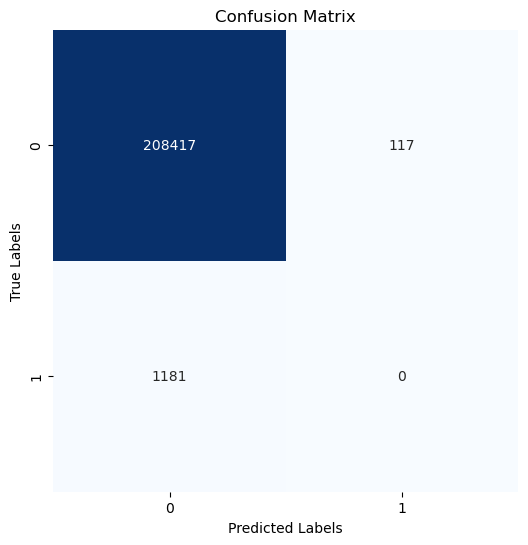

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# PRECISION CURVE

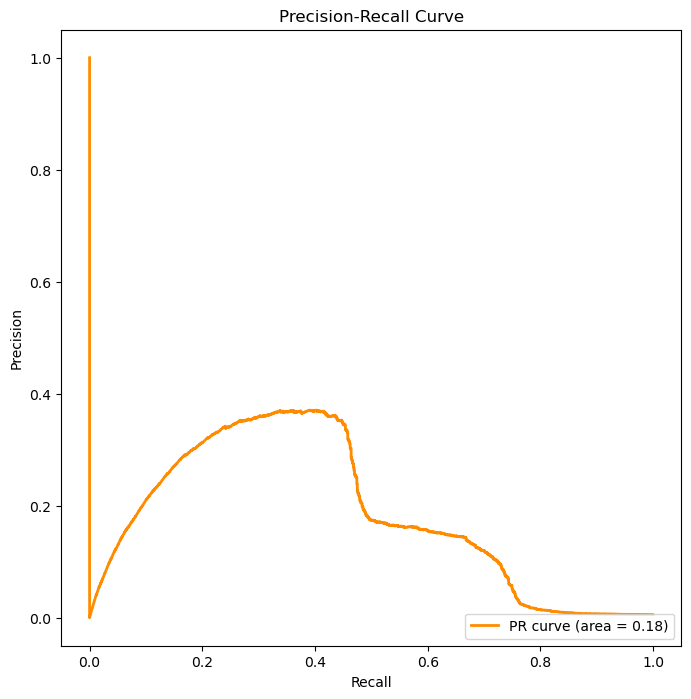

In [21]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, _ = precision_recall_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()


# ROC

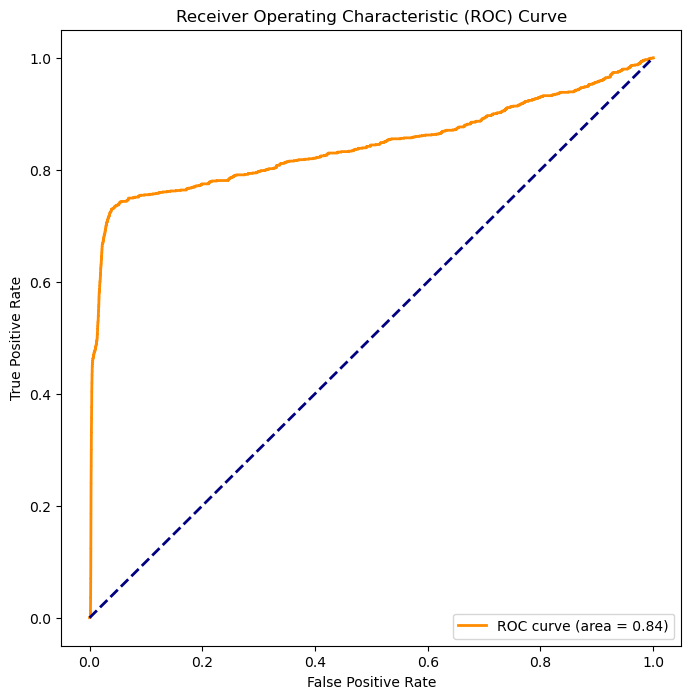

In [22]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## DISTRIBUTION OF PREDICTED PROBABILITIES

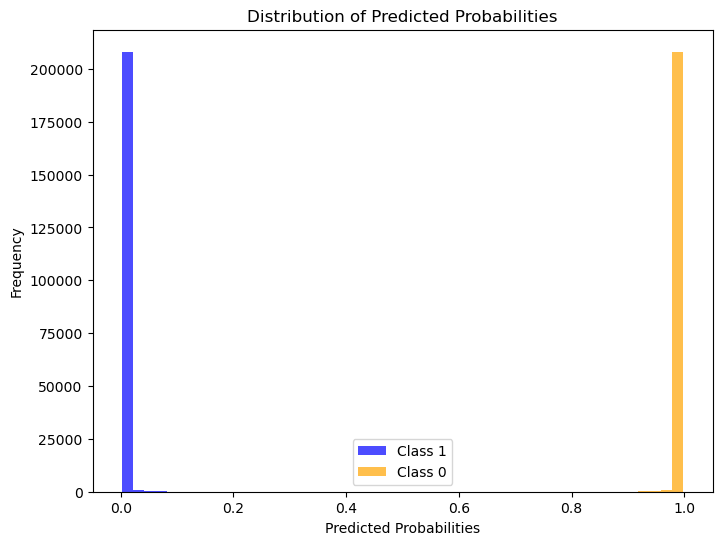

In [23]:
plt.figure(figsize=(8, 6))
plt.hist(lr_model.predict_proba(X_test)[:, 1], bins=50, alpha=0.7, color='blue', label='Class 1')
plt.hist(lr_model.predict_proba(X_test)[:, 0], bins=50, alpha=0.7, color='orange', label='Class 0')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.show()


# IMPORTANCE OF EACH FEATURE

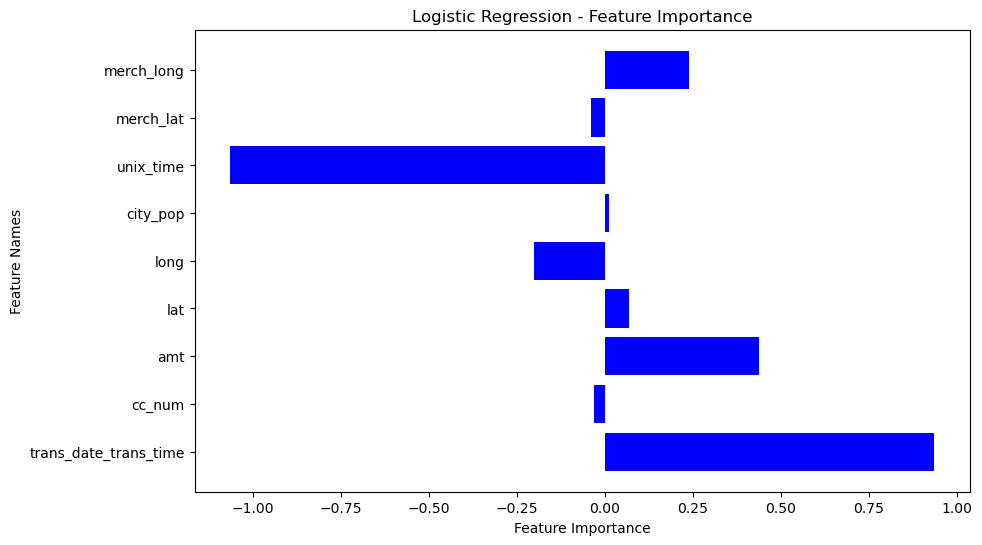

In [24]:
if hasattr(lr_model, 'coef_'):
    feature_importance = lr_model.coef_[0]
    feature_names = X.columns

    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, feature_importance, color='blue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')
    plt.title('Logistic Regression - Feature Importance')
    plt.show()


# DECISION TREE

In [37]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [38]:
lr_predictions = lr_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

In [39]:
# Model evaluation
models = [('Logistic Regression', lr_predictions),
          ('Decision Tree', dt_predictions),]

for model_name, predictions in models:
    accuracy = accuracy_score(y_test, predictions)
    confusion_mat = confusion_matrix(y_test, predictions)
    classification_rep = classification_report(y_test, predictions)

    print(f'\n{model_name} Model:')
    print(f'Accuracy: {accuracy}')
    print(f'Confusion Matrix:\n{confusion_mat}')
    print(f'Classification Report:\n{classification_rep}')


Logistic Regression Model:
Accuracy: 0.9938106477838972
Confusion Matrix:
[[208417    117]
 [  1181      0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    208534
           1       0.00      0.00      0.00      1181

    accuracy                           0.99    209715
   macro avg       0.50      0.50      0.50    209715
weighted avg       0.99      0.99      0.99    209715


Decision Tree Model:
Accuracy: 0.9932575161528742
Confusion Matrix:
[[207788    746]
 [   668    513]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208534
           1       0.41      0.43      0.42      1181

    accuracy                           0.99    209715
   macro avg       0.70      0.72      0.71    209715
weighted avg       0.99      0.99      0.99    209715

